# Laboratory #02 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

### **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![black_and_white_patches.png](https://drive.google.com/uc?export=view&id=1Iuf870gS6DuFzMtnXs53DLuiXy0oARaw)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


Text(0.5, 1.0, 'Third')

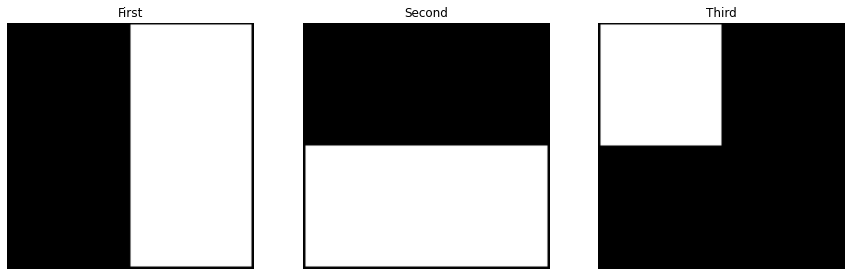

In [ ]:
# solution
first = np.zeros((100, 100,3))
second = np.zeros((100, 100,3))
third = np.zeros((100, 100,3))

first[1:99,50:99] = 256
second[50:99,1:99] = 256
third[1:50,1:50] = 256


#second = arr[50:]=256

# create figure
fig = plt.figure(figsize=(15, 30))

# Adds a subplot at the 1st position
fig.add_subplot(1, 3, 1)
  
# showing image
plt.imshow(first)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(1, 3, 2)
  
# showing image
plt.imshow(second)
plt.axis('off')
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(1, 3, 3)
  
# showing image
plt.imshow(third)
plt.axis('off')
plt.title("Third")


*   Use the above three images to create the following image

![color_patches.png](https://drive.google.com/uc?export=view&id=1UxmFHToC4TUjgtB7UQMbB3DM3RIZlgBZ)

*Hint: Remember channels and color spaces*

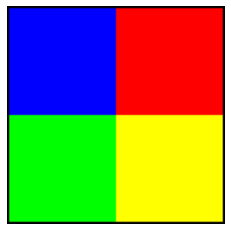

In [ ]:
arr = np.zeros((100, 100,3))
arr[1:50,1:50,2]=256
arr[1:99,50:99,0]=256
arr[50:99,1:99,1]=256

plt.axis('off')
plt.imshow(arr)

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![sillas.jpg](https://drive.google.com/uc?export=view&id=1Ged9FdDWIcipbNxNatGgCZyRdQvcGtoG)

*   Extract individual channels and plot them using matplotlib subplot.



In [ ]:
# solution
from google.colab import drive
import requests
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'Blue channel')

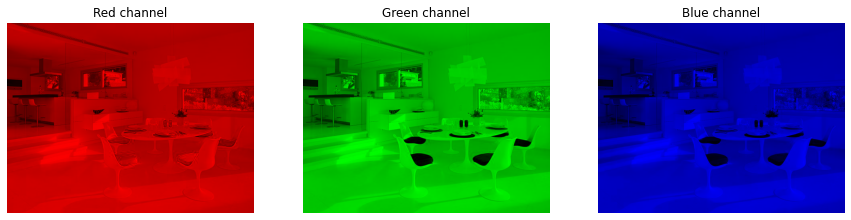

In [ ]:
path ='/content/drive/MyDrive/Computer Vision/P02_27_sep_2022_operators_and_filters/images/sillas.jpg'
img = io.imread(path)


red_image = img.copy() # Make a copy
red_image[:,:,1] = 0
red_image[:,:,2] = 0

green_image = img.copy() # Make a copy
green_image[:,:,0] = 0
green_image[:,:,2] = 0

blue_image = img.copy() # Make a copy
blue_image[:,:,0] = 0
blue_image[:,:,1] = 0


# create figure
fig = plt.figure(figsize=(15, 30))

# Adds a subplot at the 1st position
fig.add_subplot(1, 3, 1)
  
# showing image
plt.imshow(red_image)
plt.axis('off')
plt.title("Red channel")
  
# Adds a subplot at the 2nd position
fig.add_subplot(1, 3, 2)
  
# showing image
plt.imshow(green_image)
plt.axis('off')
plt.title("Green channel")
  
# Adds a subplot at the 3rd position
fig.add_subplot(1, 3, 3)
  
# showing image
plt.imshow(blue_image)
plt.axis('off')
plt.title("Blue channel")

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

(476, 618, 3)


Text(0.5, 1.0, 'BLUE')

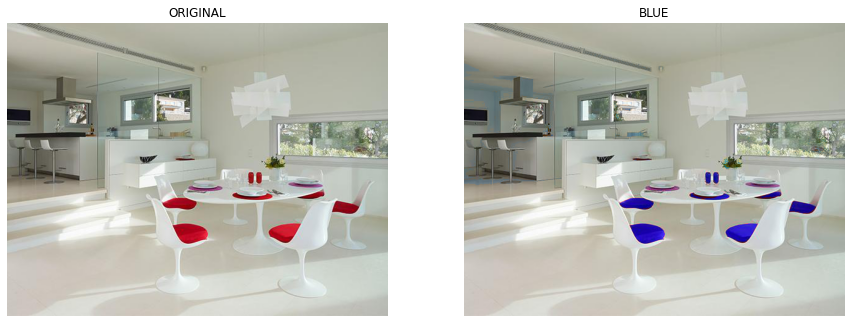

In [ ]:
# solution
change_to_blue = img.copy() # Make a copy
red_channel = change_to_blue[:,:,0]
green_channel = change_to_blue[:,:,1]
blue_channel = change_to_blue[:,:,2]

threshhold = 110;
second_thresh = 110;


for idx, x in np.ndenumerate(red_channel):
  if x > threshhold:
    if blue_channel[idx] < second_thresh:
      red_channel[idx],blue_channel[idx] = blue_channel[idx],red_channel[idx]




change_to_blue = cv2.merge((red_channel,green_channel,blue_channel))
print(change_to_blue.shape)


# create figure
fig = plt.figure(figsize=(15, 30))

# Adds a subplot at the 1st position
fig.add_subplot(1, 2, 1)
  
# showing image
plt.imshow(img)
plt.axis('off')
plt.title("ORIGINAL")
  
# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
  
# showing image
plt.imshow(change_to_blue)
plt.axis('off')
plt.title("BLUE")

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![model_and_coat.png](https://drive.google.com/uc?export=view&id=1DOieJOrfwe34z0-3EEBVyX1Ac45sb5SN)


(1188, 915, 3)
(1188, 915, 3)


Text(0.5, 1.0, 'MODEL 2')

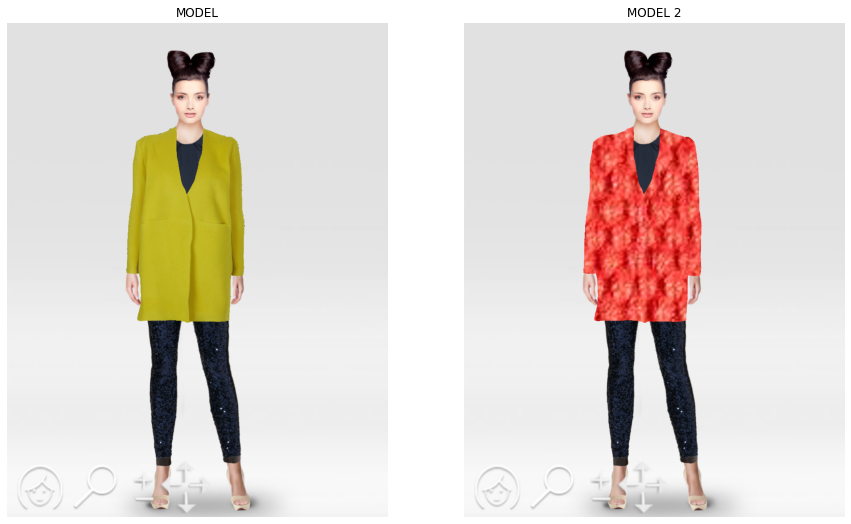

In [ ]:
import copy
# solution

coat = io.imread("/content/drive/MyDrive/Computer Vision/P02_27_sep_2022_operators_and_filters/images/coat.png")
model =  io.imread("/content/drive/MyDrive/Computer Vision/P02_27_sep_2022_operators_and_filters/images/model.png")
texture = io.imread("/content/drive/MyDrive/Computer Vision/P02_27_sep_2022_operators_and_filters/images/texture2.png")
coat_two= io.imread("/content/drive/MyDrive/Computer Vision/P02_27_sep_2022_operators_and_filters/images/coat.png")
model_two = io.imread("/content/drive/MyDrive/Computer Vision/P02_27_sep_2022_operators_and_filters/images/model.png")

coat = cv2.cvtColor(coat, cv2.COLOR_BGRA2BGR)
coat_two = cv2.cvtColor(coat, cv2.COLOR_BGRA2BGR)

model = cv2.cvtColor(model, cv2.COLOR_BGRA2BGR)
model_two = cv2.cvtColor(model, cv2.COLOR_BGRA2BGR)

texture = cv2.cvtColor(texture, cv2.COLOR_BGRA2BGR)


texture = cv2.cvtColor(texture, cv2.COLOR_BGRA2BGR)
print(texture.shape)
print(coat_two.shape)

for idx, x in np.ndenumerate(coat):
  
  if x != 0:
    coat_two[idx] = texture[idx]

for idx, x in np.ndenumerate(coat):
  
  if x != 0:
    model[idx] = x
    model_two[idx]=coat_two[idx]

# create figure
fig = plt.figure(figsize=(15, 30))

# Adds a subplot at the 1st position
fig.add_subplot(1, 2, 1)
  
# showing image
plt.imshow(model)
plt.axis('off')
plt.title("MODEL")
  
# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
  
# showing image
plt.imshow(model_two)
plt.axis('off')
plt.title("MODEL 2")


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




Text(0, 0.5, 'Pixel count')

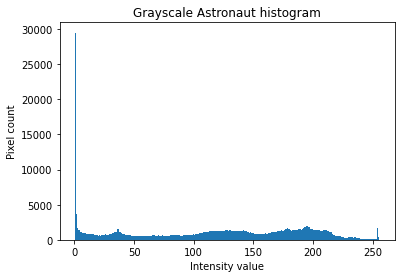

In [ ]:
from skimage import data
from skimage.color import rgb2gray
from skimage.exposure import histogram

image = data.astronaut()
gray = rgb2gray(image)*256
hist, bin_centers = histogram(gray)


#plt.plot(bin_centers, hist)
plt.hist(bin_centers, bins=256, weights=hist) 
plt.title('Grayscale Astronaut histogram')
plt.xlabel("Intensity value")
plt.ylabel("Pixel count")

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

Text(0, 0.5, 'Pixel count')

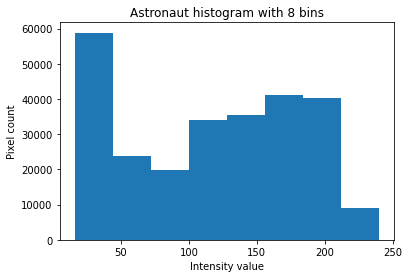

In [ ]:
hist, bin_centers = histogram(gray,nbins=8)

plt.hist(bin_centers, bins=8, weights=hist)
plt.title('Astronaut histogram with 8 bins')
plt.xlabel("Intensity value")
plt.ylabel("Pixel count")



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

The larger the bin count the more specific the histogram will be about the number of pixels per intensity. Depending on the number of bins we will be able to visualize the distribution of pixels. If it is too large it will be too specific, we will know exactly the number of pixels per intensity value, if it is too small it will encompass too many intensities. 

The intensity values go from 0 to 256. We decided to square root 256 to have evenly distributed bins. 

Text(0, 0.5, 'Pixel count')

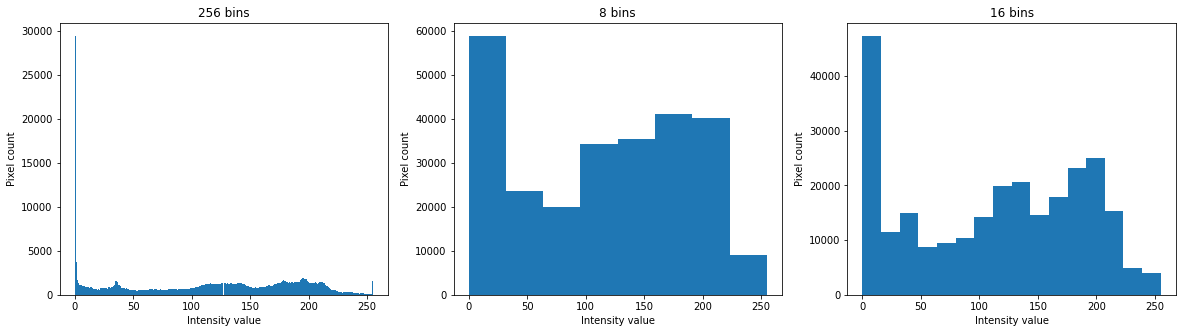

In [ ]:
bins = [256,8,16] 

hist_original, bin_centers_original = histogram(gray,nbins=bins[0])
hist_low, bin_centers_low = histogram(gray,nbins=bins[1])
hist_medium, bin_centers_medium = histogram(gray,nbins=bins[2])

titles = ['256 bins', '8 bins', '16 bins']


# create figure
fig = plt.figure(figsize=(20,5))

fig.add_subplot(1, 3, 1)
plt.hist(bin_centers_original, bins=bins[0],range=(0,255), weights=hist_original)
plt.title(titles[0])
plt.xlabel("Intensity value")
plt.ylabel("Pixel count")

fig.add_subplot(1, 3, 2)
plt.hist(bin_centers_low, bins=bins[1],range=(0,255), weights=hist_low)
plt.title(titles[1])
plt.xlabel("Intensity value")
plt.ylabel("Pixel count")

fig.add_subplot(1, 3, 3)
plt.hist(bin_centers_medium, bins=bins[2],range=(0,255), weights=hist_medium)
plt.title(titles[2])
plt.xlabel("Intensity value")
plt.ylabel("Pixel count")


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  # Remove the CWD from sys.path while we load stuff.


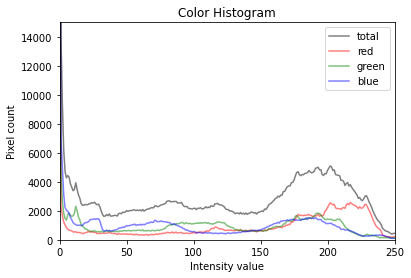

In [ ]:
#solution
image=data.astronaut()
red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]
bins = 256
pixel_range = [0,255]

# Computing the histogram for the image and for each channel
hist_original, bin_centers_original = histogram(image,bins)
red_hist, red_bin = histogram(red,bins)
green_hist, green_bin = histogram(green,bins)
blue_hist, blue_bin = histogram(blue,bins)

###### AS A HISTOGRAM #########
# plt.hist(bin_centers_original, bins, pixel_range, weights=hist_original, color='k', alpha=0.5, label='total')
# plt.hist(red_bin, bins, pixel_range, weights=red_hist, color='red', alpha=0.5, label='red')
# plt.hist(green_bin, bins, pixel_range, weights=green_hist, color='green', alpha=0.5, label='green')
# plt.hist(blue_bin, bins, pixel_range, weights=blue_hist, color='blue', alpha=0.5, label='blue')

####### AS A PLOT #########
plt.plot(bin_centers_original, hist_original, color='k', alpha=0.5, label='total')
plt.plot(red_bin, red_hist, color='red', alpha=0.5, label='red')
plt.plot(green_bin, green_hist, color='green', alpha=0.5, label='green')
plt.plot(blue_bin, blue_hist, color='blue', alpha=0.5, label='blue')
plt.xlim([0,250]) 
plt.ylim([0,15000]) #zoom in, only considering when there is less than 15000 pixels

plt.legend(loc='upper right')
plt.title("Color Histogram")
plt.xlabel("Intensity value")
plt.ylabel("Pixel count")
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  
/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


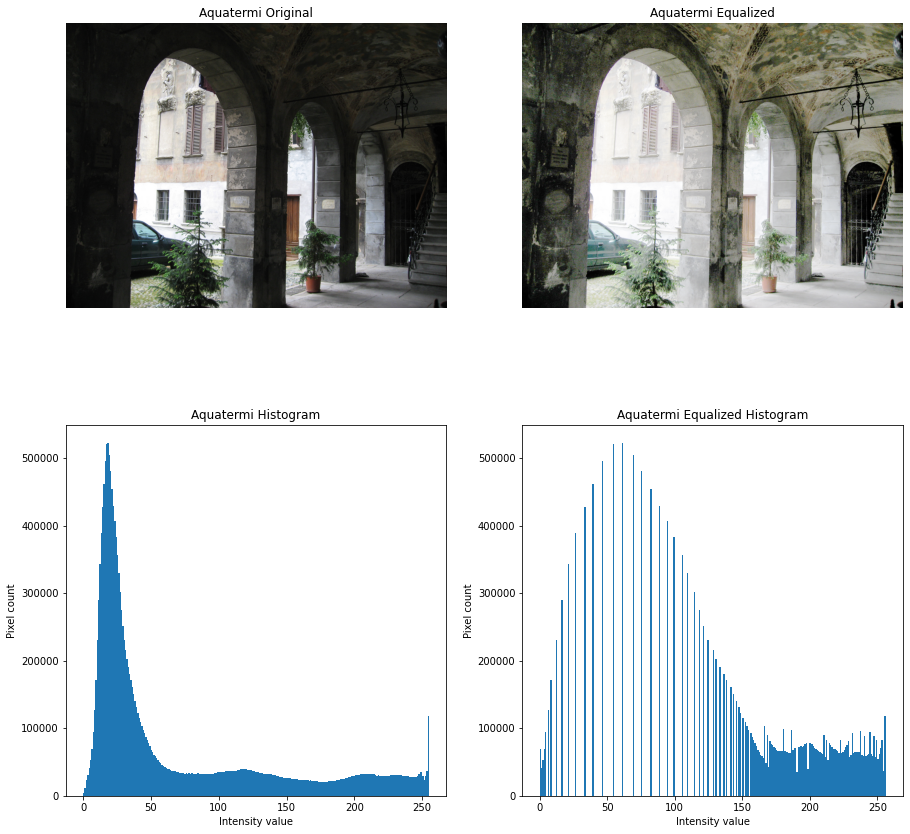

In [ ]:
# solution
from skimage.exposure import histogram
aquatermi_low =  io.imread('/content/drive/MyDrive/Computer Vision/P02_27_sep_2022_operators_and_filters/images/aquatermi_lowcontrast.jpg')

# Computing histogram equalization 
aqua_hist, aqua_bin = histogram(aquatermi_low,256)

# Equalization
aquatermi_equalized = exposure.equalize_hist(aquatermi_low)*256
aquatermi_equalized = aquatermi_equalized.astype(int)

# create figure
fig = plt.figure(figsize=(15,15))

######### Images ########

# Image in 1st row, 1st column
fig.add_subplot(2, 2, 1)
  
# showing image
plt.imshow(aquatermi_low)
plt.axis('off')
plt.title("Aquatermi Original")
  
# Image in 1st row, 2nd column
fig.add_subplot(2, 2, 2)
  
# showing image
plt.imshow(aquatermi_equalized)
plt.axis('off')
plt.title("Aquatermi Equalized")

########## HISTOGRAMS ##############

# Histogram in 2nd row, 1 column
fig.add_subplot(2, 2, 3)
  
# Aquatermi Histogram
plt.hist(aqua_bin, bins=256, range=(0,255), weights=aqua_hist)
plt.title("Aquatermi Histogram")
plt.xlabel("Intensity value")
plt.ylabel("Pixel count")


# Histogram in 2nd row, 2nd column
fig.add_subplot(2, 2, 4)
  
# Equalized histogram
plt.hist(aquatermi_equalized.ravel(), 256)
plt.title("Aquatermi Equalized Histogram")
plt.xlabel("Intensity value")
plt.ylabel("Pixel count")
plt.show()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

With linear contrast stretching we can either decide to stretch between the minimum and the maximum values of intensity, or we can decide between which values we want to stretch the histogram.  

Percentile Streching is used when the range of the image pixels is from 0 to 255 because if we use the min-max formula we will not get a streched image. 

Histogram Equalisation uses probability distribution so in the most cases it performs better. 


### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [ ]:
# solution
def strech_channel(gray_image_to_scale,min=-1,max=-1):
  minmax_img = np.zeros((gray_image_to_scale.shape[0],gray_image_to_scale.shape[1]),dtype=int)

  if min is -1:
    min = np.min(gray_image_to_scale)
  if max is -1:
    max = np.max(gray_image_to_scale)

  g = max-min
  for idx, p in np.ndenumerate(gray_image_to_scale):
    if min < p < max:
      x = int(255*((p-min)/g))
      minmax_img[idx] = x
    else:
      minmax_img[idx] = p
  return minmax_img

In [ ]:

image =  io.imread('/content/drive/MyDrive/Computer Vision/P02_27_sep_2022_operators_and_filters/images/aquatermi_lowcontrast.jpg')
gray_img = np.uint8(rgb2gray(image) * 255)
streched_image = strech_channel(gray_img,min = 10, max= 110)

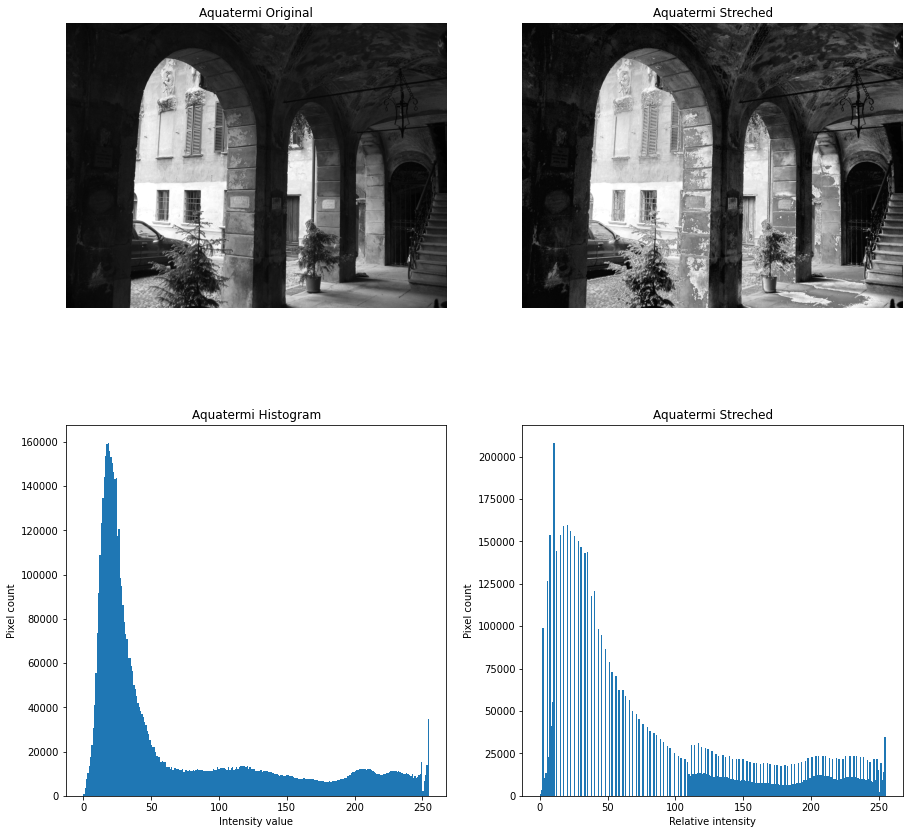

In [ ]:
# Create figure
fig = plt.figure(figsize=(15,15))


######### Images ########

# Image in 1st row, 1st column
fig.add_subplot(2, 2, 1)

# showing image
plt.imshow(gray_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Aquatermi Original")
  
# Image in 1st row, 2nd column
fig.add_subplot(2, 2, 2)
  
# showing image
plt.imshow(streched_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Aquatermi Streched")

########## HISTOGRAMS ##############


# Histogram in 2nd row, 1 column
fig.add_subplot(2, 2, 3)
  
# Aquatermi Histogram
plt.hist(gray_img.ravel(),256)
plt.title("Aquatermi Histogram")
plt.xlabel("Intensity value")
plt.ylabel("Pixel count")


# Histogram in 2nd row, 2nd column
fig.add_subplot(2, 2, 4)
  
# Equalized histogram
plt.hist(streched_image.ravel(), 256)
plt.title("Aquatermi Streched")
plt.xlabel("Relative intensity")
plt.ylabel("Pixel count")
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




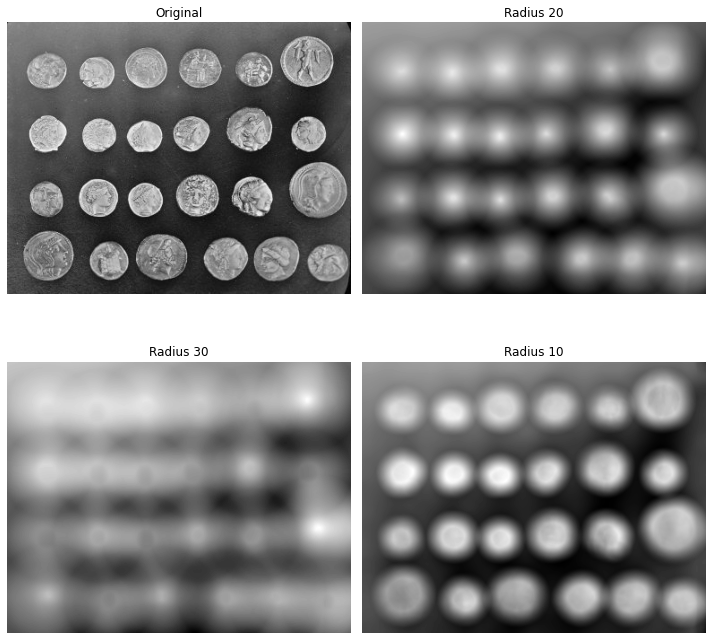

In [ ]:
# solution
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import mean
coins = data.coins()

selem_20 = disk(20)
coins_r20 = mean(coins,selem_20)

selem_30 = disk(30)
coins_r30 = mean(coins,selem_30)

selem_10 = disk(10)
coins_r10 = mean(coins,selem_10)

######
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

titles = ['Original', 'Radius 20', 'Radius 30', 'Radius 10']
images = [coins, coins_r20, coins_r30, coins_r10]
for n in range(0, len(images)):
    ax[n].imshow(images[n], cmap=plt.cm.gray)
    ax[n].set_title(titles[n])
    ax[n].axis('off')

plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

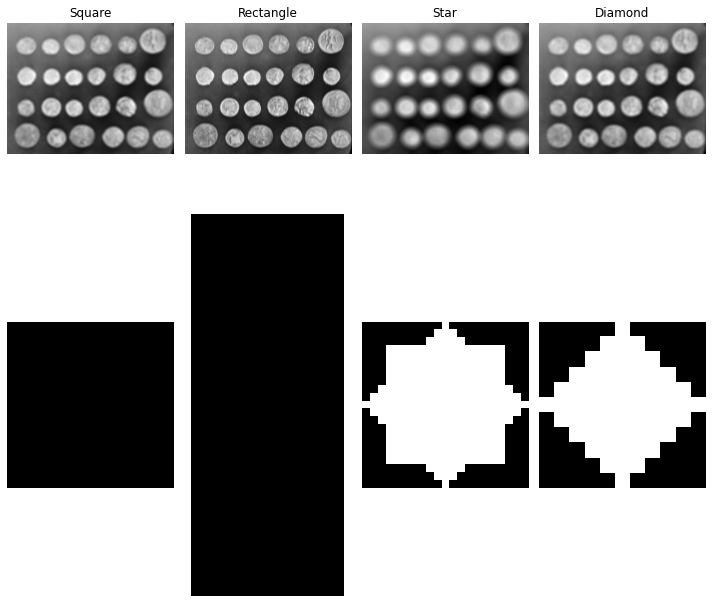

In [ ]:
# solution
from skimage.morphology import square, rectangle, star, diamond
square = square(7)
rectangle =  rectangle(5,2)
star = star(7)
diamond =  diamond(5)

coins_square = mean(coins,square)
coins_rectangle = mean(coins,rectangle)
coins_star = mean(coins,star)
coins_diamond = mean(coins,diamond)


######
fig, ax = plt.subplots(2,4, figsize=(10, 10))


titles = ['Square', 'Rectangle', 'Star','Diamond']
images = [coins_square, coins_rectangle, coins_star, coins_diamond]
secondImages = [square,rectangle,star,diamond]

for i in range(0, len(images)):
    ax[0,i].imshow(images[i], cmap='gray')
    ax[1,i].imshow(secondImages[i],cmap='gray')
    ax[0,i].set_title(titles[i])
    ax[0,i].axis('off')
    ax[1,i].axis('off')


plt.tight_layout()
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

The larger the radius the greater the smoothing of the pictures. When the radius of the disk is 10, there is little smoothing, whereas when the radius is 30, the smoothing is extensive. 


*   What is the observed behaviour with difference in the structuring element?



**Solution**

The smoothed area will be the same as the shape of the structuring element. The areas of the image that are covered by the structure will be smoothed to a same value. 



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

The difference between mean filter and gaussian filter:
Gaussian filters are based on the Gaussian function. Following the bell shape, the further away from the central pixel, the greater the smoothing will be applied (lower weights). 
On the other hand, Mean-filters are based on the geometric mean, it will average the pixel values of all neighboring pixels. 

Mean and Gaussian filters, filter out noise of the image.Gaussian filter separates better frequencies and Mean filter is less computationally expensive than Gaussian filter. Finally, Mean filter is generally used to filter out Gaussian noise [2]. 

REFERENCES:

[1] Svi.nl. 2022. ImageHistogram | Scientific Volume Imaging. [online] Available at: <https://svi.nl/ImageHistogram> [Accessed 6 October 2022]

[2] Gonzalez, Rafael (2002). Digital Image Processing 3nd Edition. Prentice Hall. pp. 232–233. ISBN 0201180758


---

## **End of P2: Image operators and filters**

Deadline for P2 submission in CampusVirtual is: **Thursday, the 6th of October, 2022**
